# 6.3 Geographical Visualizations with Python

### Step 3: Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

### Step 4: Find a JSON/GeoJSONfile containing location data that corresponds to the location data in your student project data.

In [2]:
# Import dataset and JSON files
path = r'/Users/minglunchen/Desktop/A6_Project_Yiru'
df_heart = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'heart_2022_no_nans.csv'), index_col = False)

In [3]:
country_geo = r'/Users/minglunchen/Desktop/Yiru_CF_A6/E6.3/us-states.json'

### Step 5&6: Wrangle your project data to meet the needs of your analysis. Clean your data set—watch for missing and extreme values.

In [4]:
# Check the dataset
df_heart.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            None of them             No  ...           1.60   
1         6.0            None of them             No  ...           1.78   
2         8.0  6 or more, but not all             No  ...           1.85   
3         9.0            None of them             No  ...           1.70   
4         5.0                  1 to 5             No  ...           1.55   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0             71.67  27.99              No         No          Yes   
1             95.25  30.13              No         No          Yes   
2            108.86  31.66             Yes         No           No   
3             90.72  31.32              No         No          Yes   
4             79.38  33.07              No         No          Yes   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0           Yes                                 Yes, received Tdap   
1           Yes  Yes, received tetanus shot but not sure what type   
2           Yes  No, did not receive any tetanus shot in the pa...   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No      Yes  
4               No       No  

[5 rows x 40 columns]

Since I have a clear objective of a geographical analysis which is to identify the suffering rate of heart disease in each state (questions stated in my project brief), I decide to  
(1) group the counts of individual who had/not had heart disease by states,  
(2) calculate the suffering rate in each state,  
(3) visualize the suffering rate in the map.

In [5]:
# Create a new dataframe 'df_replace' replacing the text with '1' and '0' to make the 'HadHeartAttack' easier to proceed.
df_replace =  df_heart[df_heart.columns].replace({'Yes':1, 'No':0})

In [6]:
df_replace.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime  PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                   1   
1  Within past year (anytime less than 12 months ...                   1   
2  Within past year (anytime less than 12 months ...                   0   
3  Within past year (anytime less than 12 months ...                   1   
4  Within past year (anytime less than 12 months ...                   1   

   SleepHours            RemovedTeeth  HadHeartAttack  ...  HeightInMeters  \
0         9.0            None of them               0  ...            1.60   
1         6.0            None of them               0  ...            1.78   
2         8.0  6 or more, but not all               0  ...            1.85   
3         9.0            None of them               0  ...            1.70   
4         5.0                  1 to 5               0  ...            1.55   

   WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  FluVaxLast12  \
0              71.67  27.99                0           0             1   
1              95.25  30.13                0           0             1   
2             108.86  31.66                1           0             0   
3              90.72  31.32                0           0             1   
4              79.38  33.07                0           0             1   

   PneumoVaxEver                                  TetanusLast10Tdap  \
0              1                                 Yes, received Tdap   
1              1  Yes, received tetanus shot but not sure what type   
2              1  No, did not receive any tetanus shot in the pa...   
3              1  No, did not receive any tetanus shot in the pa...   
4              1  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear  CovidPos  
0                0         0  
1                0         0  
2                0         1  
3                0         1  
4                0         0  

[5 rows x 40 columns]

In [7]:
# Create a new data frame 'df_heart_attack' including individuals who HAD heart disease
df_heart_attack = df_replace[df_replace['HadHeartAttack'] == 1]

In [8]:
# Create a new data frame 'df_heart_attack_state' grouping the counts of individuals by states
df_heart_attack_state = df_heart_attack.groupby('State').size().reset_index(name='counts')

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='counts', ylabel='Count'>

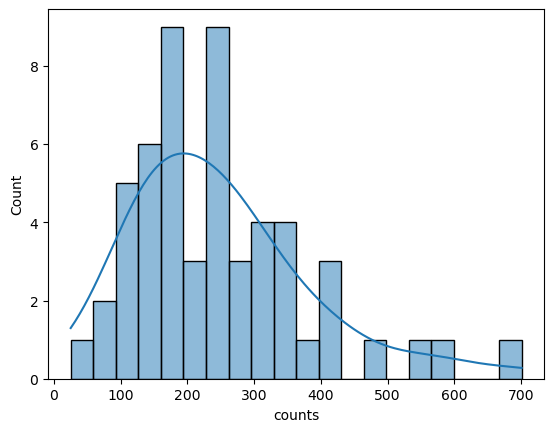

In [9]:
# Check for extreme values with histogram
sns.histplot(df_heart_attack_state['counts'], bins=20, kde = True) 

By observing the histogram, I would NOT say there are extreme values regarding the counts of indivuduals having heart disease.

In [10]:
# Create a new data frame 'df_no_heart_attack' including individuals who do NOT have heart disease
df_no_heart_attack = df_replace[df_replace['HadHeartAttack'] == 0]

In [11]:
# Create a new data frame 'df_no_heart_attack_state' grouping the counts of individuals by states
df_no_heart_attack_state = df_no_heart_attack.groupby('State').size().reset_index(name='counts_nohd')

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='counts_nohd', ylabel='Count'>

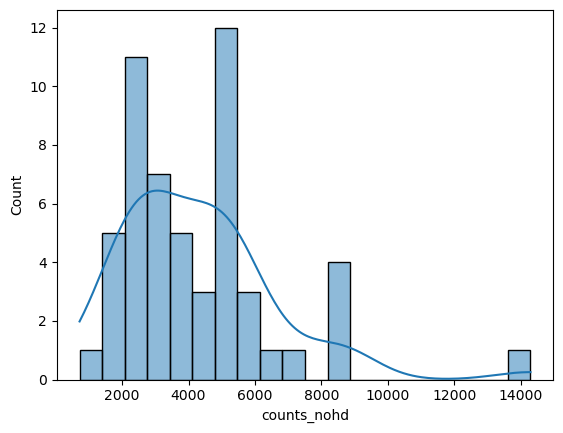

In [12]:
# Check for extreme values with histogram
sns.histplot(df_no_heart_attack_state['counts_nohd'], bins=20, kde = True) 

By observing the histogram, I would NOT say there are extreme values regarding the counts of indivuduals not having heart disease.

In [13]:
# Merge these two dataframes by column 'State'
df_merged_state = df_heart_attack_state.merge(df_no_heart_attack_state, on = 'State', indicator = True)

In [14]:
df_merged_state.head()

State  counts  counts_nohd _merge
0     Alabama     124         1778   both
1      Alaska     165         3040   both
2     Arizona     359         5103   both
3    Arkansas     244         2696   both
4  California     214         4882   both

In [15]:
# Calculate the rate and add it into the merged dataframe
df_merged_state['rate'] = df_merged_state['counts'] / (df_merged_state['counts'] + df_merged_state['counts_nohd'])

In [16]:
df_merged_state['rate'] = df_merged_state['rate'] * 100

In [17]:
# Check whether the merging and calculation are well done
df_merged_state.head()

State  counts  counts_nohd _merge      rate
0     Alabama     124         1778   both  6.519453
1      Alaska     165         3040   both  5.148206
2     Arizona     359         5103   both  6.572684
3    Arkansas     244         2696   both  8.299320
4  California     214         4882   both  4.199372

### Step 7: Create a choropleth map using a variable of your choice.

In [20]:
# Setup a folium map at a high-level zoom
map_rate_state = folium.Map(location = [100, 0], zoom_start = 1.5)

# Create a choropleth map with merged dataframe
folium.Choropleth(
    geo_data = country_geo, 
    data = df_merged_state,
    columns = ['State', 'rate'],
    key_on = 'feature.properties.name',
    fill_color = 'OrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Suffering Rate").add_to(map_rate_state)
folium.LayerControl().add_to(map_rate_state)

map_rate_state

In [24]:
# Export the map outside of Jupyter in the form of html file
map_rate_state.save(os.path.join(path, '04 Analysis','Visualizations', 'map_rate_state.html'))

### Step 8: Discuss the results and what they mean in a markdown section.  
- Does the analysis answer any of your existing research questions?  
- Does the analysis lead you to any new research questions?

**Answers:**  
  
1) Yes, the analysis answered my research questions:  
- 'Does the suffering rate of heart disease differ among states?': **Yes**, it is obvious based on the various colors shown on the map.
- 'Which states have the highest suffering rate?': **Arkansas, West Virgina and Florida** are top 3 states suffering from heart disease.  
  
2) Yes. Factors which are also significant in these states may probably be the dominant indicators of heart disease. Further investigation in these states regarding the other factors would be of great value.